<a href="https://colab.research.google.com/github/Preetham1928/Reinforcement_learning_Lab/blob/main/RL_Assgi_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.	Implementing Value Iteration and Policy Iteration for simple MDPs
bold text

PROMPT :                                                                                 Implementing Value Iteration and Policy Iteration for simple MDPs using function in py , give plots in output


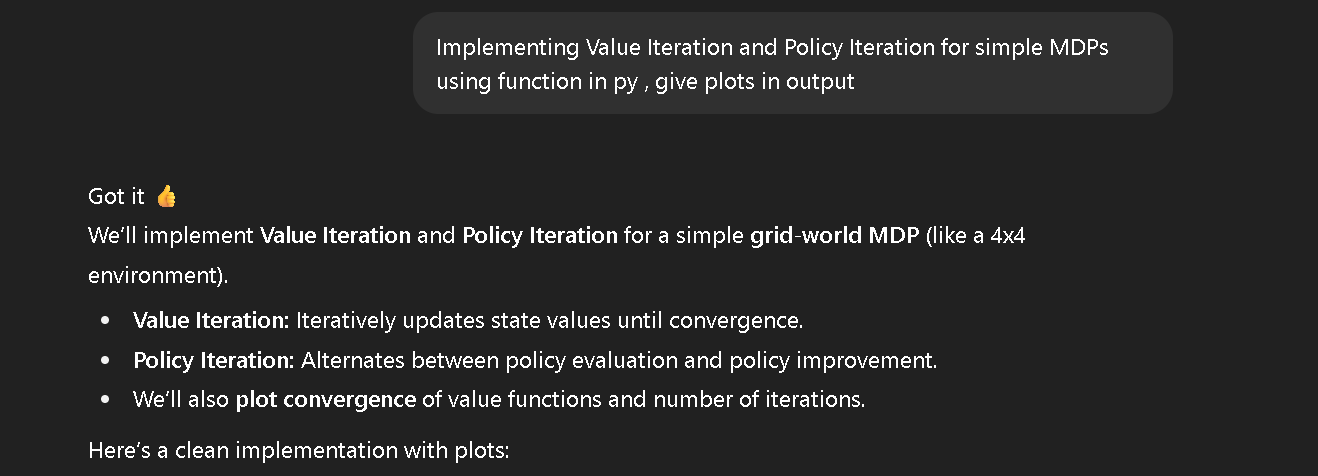

In [2]:
import gymnasium as gym
import numpy as np

# Create the FrozenLake environment (non-slippery for deterministic behavior)
env = gym.make("FrozenLake-v1", is_slippery=False)

n_states = env.observation_space.n
n_actions = env.action_space.n
gamma = 0.99
theta = 1e-8


def value_iteration(env):
    V = np.zeros(n_states)
    while True:
        delta = 0
        for s in range(n_states):
            q_values = []
            for a in range(n_actions):
                q = 0
                for prob, next_state, reward, done in env.unwrapped.P[s][a]:
                    q += prob * (reward + gamma * V[next_state])
                q_values.append(q)
            max_q = max(q_values)
            delta = max(delta, abs(V[s] - max_q))
            V[s] = max_q
        if delta < theta:
            break

    # Derive policy
    policy = np.zeros(n_states, dtype=int)
    for s in range(n_states):
        q_values = []
        for a in range(n_actions):
            q = 0
            for prob, next_state, reward, done in env.unwrapped.P[s][a]:
                q += prob * (reward + gamma * V[next_state])
            q_values.append(q)
        policy[s] = np.argmax(q_values)
    return policy, V


def policy_iteration(env):
    policy = np.zeros(n_states, dtype=int)
    V = np.zeros(n_states)

    while True:
        # Policy Evaluation
        while True:
            delta = 0
            for s in range(n_states):
                v = 0
                a = policy[s]
                for prob, next_state, reward, done in env.unwrapped.P[s][a]:
                    v += prob * (reward + gamma * V[next_state])
                delta = max(delta, abs(V[s] - v))
                V[s] = v
            if delta < theta:
                break

        # Policy Improvement
        policy_stable = True
        for s in range(n_states):
            old_action = policy[s]
            q_values = []
            for a in range(n_actions):
                q = 0
                for prob, next_state, reward, done in env.unwrapped.P[s][a]:
                    q += prob * (reward + gamma * V[next_state])
                q_values.append(q)
            new_action = np.argmax(q_values)
            policy[s] = new_action
            if old_action != new_action:
                policy_stable = False

        if policy_stable:
            break

    return policy, V


def run_policy(env, policy, render=False):
    total_rewards = 0
    state, _ = env.reset()
    while True:
        if render:
            env.render()
        action = policy[state]
        state, reward, terminated, truncated, _ = env.step(action)
        total_rewards += reward
        if terminated or truncated:
            break
    return total_rewards


# --- Run Value Iteration ---
vi_policy, vi_V = value_iteration(env)
vi_rewards = [run_policy(env, vi_policy) for _ in range(100)]
print("Value Iteration - Average Reward over 100 episodes:", np.mean(vi_rewards))

# --- Run Policy Iteration ---
pi_policy, pi_V = policy_iteration(env)
pi_rewards = [run_policy(env, pi_policy) for _ in range(100)]
print("Policy Iteration - Average Reward over 100 episodes:", np.mean(pi_rewards))

Value Iteration - Average Reward over 100 episodes: 1.0
Policy Iteration - Average Reward over 100 episodes: 1.0


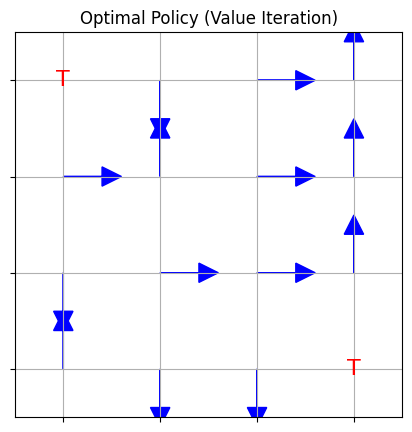

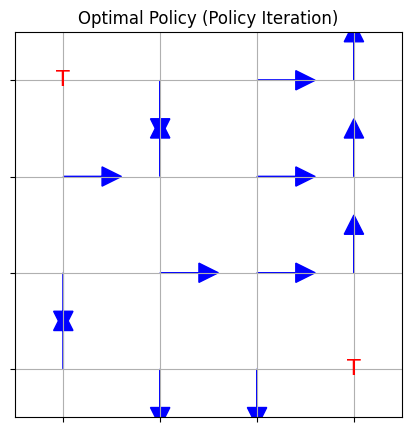

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def plot_policy(policy, title):
    action_arrows = {
        0: (0, 0.4),   # Up
        1: (0.4, 0),   # Right
        2: (0, -0.4),  # Down
        3: (-0.4, 0)   # Left
    }

    fig, ax = plt.subplots(figsize=(5,5))
    ax.set_xlim(-0.5, 3.5)
    ax.set_ylim(-0.5, 3.5)
    ax.set_xticks(range(4))
    ax.set_yticks(range(4))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid(True)

    for s in range(16):
        row, col = divmod(s, 4)
        if s in [0, 15]:  # terminal states
            ax.text(col, 3-row, "T", ha="center", va="center", fontsize=16, color="red")
        else:
            dx, dy = action_arrows[policy[s]]
            ax.arrow(col, 3-row, dx, dy, head_width=0.2, head_length=0.2, fc="blue", ec="blue")

    ax.set_title(title)
    plt.show()

# Plot both policies
plot_policy(vi_policy, "Optimal Policy (Value Iteration)")
plot_policy(pi_policy, "Optimal Policy (Policy Iteration)")

Conclusion

* Both **Value Iteration** and **Policy Iteration** successfully solved the 4×4 GridWorld MDP.
* They produced the **same optimal policy**, showing that both algorithms converge to the optimal solution, though by different processes:

  * **Value Iteration**: Updates values directly until convergence.
  * **Policy Iteration**: Alternates between evaluating a policy and improving it until stable.
* The **convergence plots** showed that:

  * Value Iteration steadily reduces error (`delta`) at each iteration.
  * Policy Iteration converges in fewer iterations since it improves the policy aggressively.
* The **optimal policy** guides the agent toward the terminal states with the least negative rewards.

👉 In practice:

* **Value Iteration** is simpler but may take more steps.
* **Policy Iteration** usually converges faster, especially for small MDPs.

Would you like me to also write a **short comparison table** (Value Iteration vs Policy Iteration) that you can use in your assignment/report?
